### Import libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aladdin import getResponse
from URLMaker import URLMaker
%matplotlib notebook

https://www.blackrock.com/tools/hackathon/portfolio-analysis?calculateExposures=true&calculatePerformance=true&graph=resultMap.PORTFOLIOS%5Bportfolios%5Bexposures%5BassetClass%5D%5D%5D&identifierType=ticker&includeAllBreakdowns=true&positions=MSFT~50%7CNFLX~20%7CFB~20%7CAMZN~10


### Request data:

Define a portfolio and create the relevant URL:

In [2]:
portfolio_dict = {"AAPL":35, "NFLX":25, "FB":10, "MSFT":30} # define a portfolio dictionary {ticker:percent,..}
url = URLMaker(portfolio_dict) # make a URL for the requested dict

Get response data:

In [3]:
dict_, overall_percentage, daily_percentage = getResponse(url) # get API response
t = np.arange(len(daily_percentage)) # a time series in units of days

In [4]:
# Convert to np arrays
overall_percentage = np.array(overall_percentage)
daily_percentage = np.array(daily_percentage)

negbar_ind = daily_percentage<0 # indices of negative value bars
posbar_ind = daily_percentage>=0 # indices of negative value bars

### Plotting data:

Full time plot

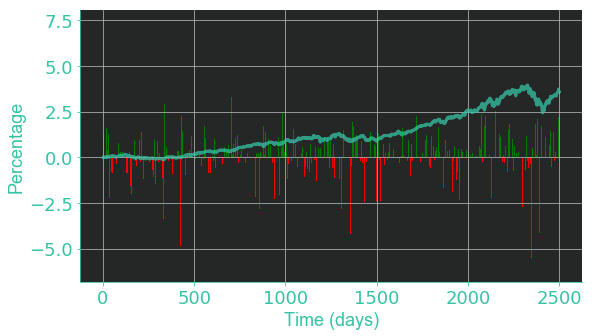

In [37]:
plt.figure(figsize = (9,5))
plt.rcParams.update({'font.size': 18})

# Plot overall stock return
plt.plot(t, overall_percentage, linewidth=3, color = (54/255,195/255,165/255), alpha=0.75)

# Plot positive daily change bars
plt.bar(t[posbar_ind], daily_percentage[posbar_ind], width=0.8, alpha=0.95, color='g')

# Plot negative daily change bars
plt.bar(t[negbar_ind], daily_percentage[negbar_ind], width=0.8, alpha=0.95, color='r')

# Change background color
ax = plt.gca()
ax.set_facecolor((36/255,39/255,38/255))

# Axis labels
font = {'fontname':'Arial'}
plt.xlabel('Time (days)', color = (54/255,195/255,165/255), **font)
plt.ylabel('Percentage', color = (54/255,195/255,165/255), **font)
ax.tick_params(axis='x', colors=(54/255,195/255,165/255))
ax.tick_params(axis='y', colors=(54/255,195/255,165/255))
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color((54/255,195/255,165/255))
ax.spines['bottom'].set_color((54/255,195/255,165/255))

# plt.grid()
# plt.savefig('1.png' ,transparent=True, format='png', dpi=1000)

Plots for last 30, 90, 150 and 360 days:

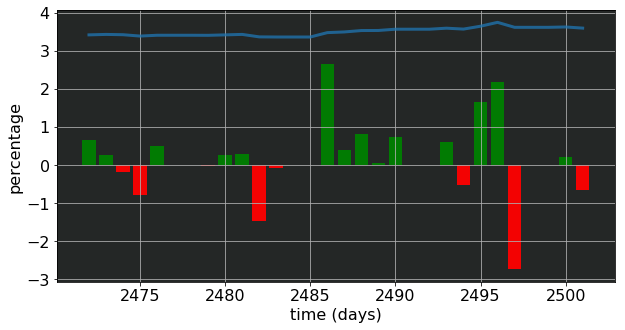

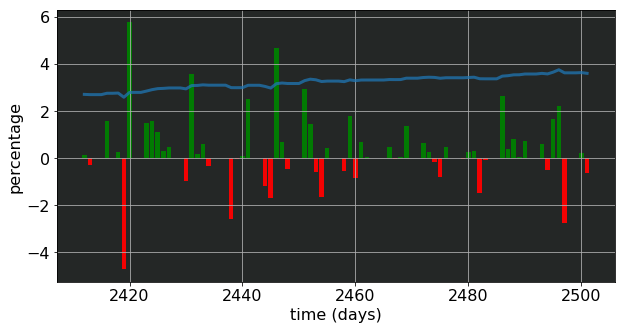

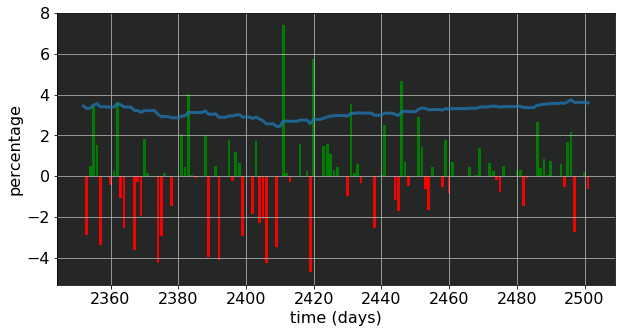

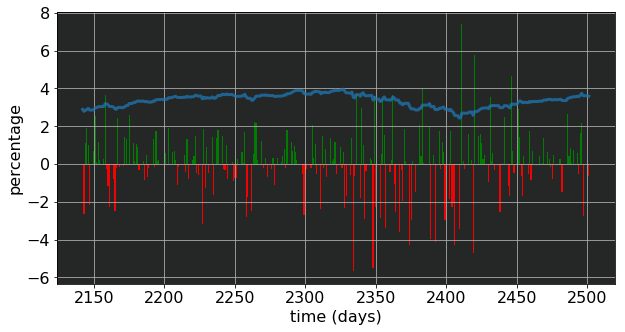

In [6]:
timespan_list = [t>t[-1]-30, t>t[-1]-90, t>t[-1]-150, t>t[-1]-360]

for timespan in timespan_list:

    plt.figure(figsize = (10,5))
    plt.rcParams.update({'font.size': 16})

    # Plot overall stock return
    plt.plot(t[timespan], overall_percentage[timespan], linewidth=3, alpha=0.75)

    # Plot positive daily change bars
    plt.bar(t[timespan & posbar_ind], daily_percentage[timespan & posbar_ind], width=0.8, alpha=0.95, color='g')

    # Plot negative daily change bars
    plt.bar(t[timespan & negbar_ind], daily_percentage[timespan & negbar_ind], width=0.8, alpha=0.95, color='r')

    # Change background color
    ax = plt.gca()
    ax.set_facecolor((36/255,39/255,38/255))

    # Axis labels
    font = {'fontname':'Arial'}
    plt.xlabel('Time (days)', color = (54/255,195/255,165/255), **font)
    plt.ylabel('Percentage', color = (54/255,195/255,165/255), **font)
    ax.tick_params(axis='x', colors=(54/255,195/255,165/255))
    ax.tick_params(axis='y', colors=(54/255,195/255,165/255))
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_color((54/255,195/255,165/255))
    ax.spines['bottom'].set_color((54/255,195/255,165/255))

#     plt.grid()